In [168]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

n = 30
# data = pd.DataFrame({
#     'stock_type': stock_type,
#     'stock_date': stock_date,
# })


## 构造股票数据
open = np.array(np.random.normal(350, 20, size=n))
close = np.array(np.random.normal(350, 20, size=n))
low = []
high = []
for i in range(n):
    min = open[i]
    max = close[i]
    if open[i] >= close[i]:
        min = close[i]
        max = open[i]
    val1 = np.random.uniform(min-20, max+20, 1)
    if val1 < min:
        val2 = np.random.uniform(min, max+20, 1)
    if val1 > max:
        val2 = np.random.uniform(min-20, max, 1)

    if val1 < val2:
        low.append(val1)
        high.append(val2)
    else:
        low.append(val2)
        high.append(val1)

data = pd.DataFrame({
    'type': np.array(['AAPL' for _ in range(n)]),
    'date': np.array(pd.date_range(start='2018-01-01', periods=n, freq='B')),
    'open': open,
    'high': np.array(high).reshape(n),
    'low': np.array(low).reshape(n),
    'close': close,
    'volume': np.array(np.random.randint(1000000, 3000000, size=n)),
}, columns=['type', 'date', 'open', 'high', 'low', 'close', 'volume'])

data.to_csv('stock_data.csv', index=False)

In [169]:
data = pd.read_csv('stock_data.csv')
print(data.head())

   type        date        open        high         low       close   volume
0  AAPL  2018-01-01  341.009617  334.328860  309.837583  304.906745  1802616
1  AAPL  2018-01-02  327.598604  363.315418  309.837583  366.005952  1191695
2  AAPL  2018-01-03  365.501390  355.729276  309.837583  334.980083  1902784
3  AAPL  2018-01-04  357.623767  368.415228  332.834291  345.884397  2669704
4  AAPL  2018-01-05  340.280014  361.871814  329.180072  346.640337  1926207


In [170]:
stock_data = np.loadtxt('stock_data.csv',
            delimiter = ',',
            # dtype = "U4, M8[D], f4, f4, f4, f4, i8",
            dtype = {
                'names':['type', 'date', 'open', 'high', 'low', 'close', 'volume'],
                'formats':['U4', 'M8[D]', 'float32', 'float32', 'float32', 'float32', 'int64']
            },
            usecols=[0,1,2,3,4,5,6], ##使用的列,必须和names的列匹配
            unpack=False, ## 是否拆包,就是降维
            ## 转换器, 列位置: (x)->{}
            converters={
                2: lambda v: np.round(np.float32(v), decimals=2),
                3: lambda v: np.round(np.float32(v), decimals=2),
                4: lambda v: np.round(np.float32(v), decimals=2),
                5: lambda v: np.round(np.float32(v), decimals=2),
            },
            skiprows=1,
            encoding='utf8'

)

print(stock_data.shape)

(30,)


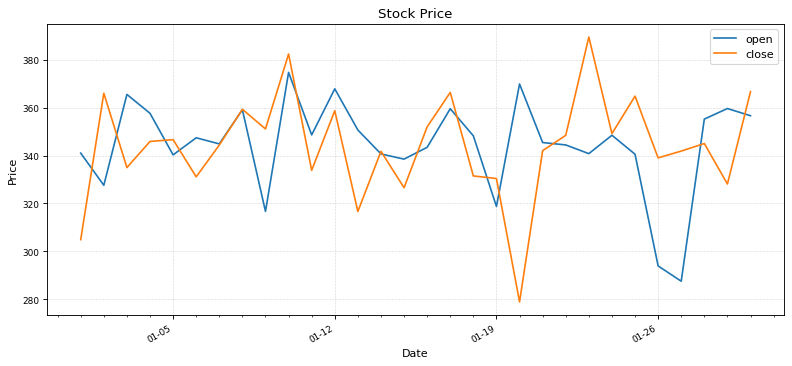

In [171]:
### 画折线图
import matplotlib.pyplot as plt
import matplotlib.dates as md

plt.figure(figsize=(10,5), dpi=80)
plt.title('Stock Price')

plt.plot(data['date'], data['open'], label='open')
plt.plot(data['date'], data['close'], label='close')

plt.xlabel('Date')
plt.ylabel('Price')

ax = plt.gca()
## 日期刻度使用
## https://matplotlib.org/stable/gallery/ticks/date_demo_convert.html
## https://matplotlib.org/stable/gallery/ticks/date_formatters_locators.html
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MONDAY.weekday))
ax.xaxis.set_major_formatter(md.DateFormatter('%m-%d'))
ax.xaxis.set_minor_locator(md.DayLocator())
###
# ax.xaxis.set_major_locator(plt.MultipleLocator(7))
# ax.xaxis.set_minor_locator(plt.MultipleLocator(1))

plt.tick_params(labelsize=8)
plt.grid(linestyle=':', linewidth=0.5)
plt.legend()
plt.tight_layout()
## 可以合理显示日期格式,防止日期格式过于拥挤,会自动调节角度
plt.gcf().autofmt_xdate()
plt.show()

343.93151418740587
344.0387086846302


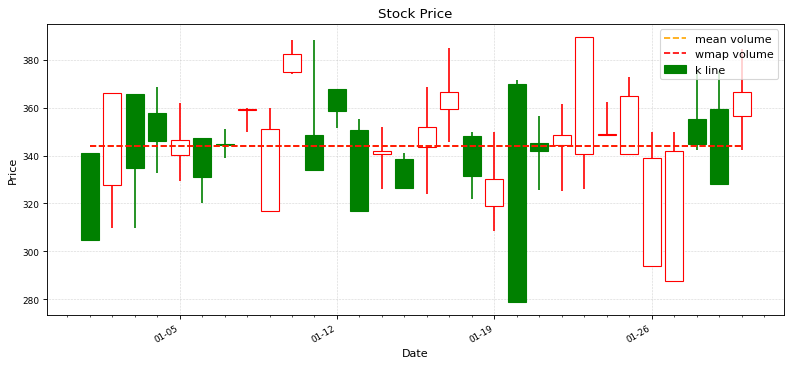

In [201]:
### 画折线图
import matplotlib.pyplot as plt
import matplotlib.dates as md

plt.figure(figsize=(10,5), dpi=80)
plt.title('Stock Price')

tmp = data['open'] > data['close']
color_arr = np.zeros_like(data['open'], dtype='U5')
color_arr[tmp] = 'green'
color_arr[~tmp] = 'white'

edgecolor_arr = np.zeros_like(data['open'], dtype='U5')
edgecolor_arr[tmp] = 'green'
edgecolor_arr[~tmp] = 'red'

plt.bar(data['date'],
        height=data['close'] - data['open'],
        width=0.8,
        bottom=data['open'],
        label='k line',
        color=color_arr,
        edgecolor=edgecolor_arr,
        zorder=10,
        )

plt.vlines(data['date'],
           ymin= data['low'],
           ymax= data['high'],
           color=edgecolor_arr,
           )

mean = np.mean(data['close'])
print(mean)
plt.hlines(mean, xmin=data['date'][0], xmax=data['date'][n-1],
           color='orange', linestyle='--', zorder=10,
           label='mean volume')
wmap = np.average(data.close, weights=data.volume)
print(wmap)
plt.hlines(wmap, xmin=data['date'][0], xmax=data['date'][n-1],
           color='red', linestyle='--', zorder=10,
           label='wmap volume'
           )


plt.xlabel('Date')
plt.ylabel('Price')

ax = plt.gca()
## 日期刻度使用
## https://matplotlib.org/stable/gallery/ticks/date_demo_convert.html
## https://matplotlib.org/stable/gallery/ticks/date_formatters_locators.html
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MONDAY.weekday))
ax.xaxis.set_major_formatter(md.DateFormatter('%m-%d'))
ax.xaxis.set_minor_locator(md.DayLocator())

plt.tick_params(labelsize=8)
plt.grid(linestyle=':', linewidth=0.5)
plt.legend()
plt.tight_layout()
## 可以合理显示日期格式,防止日期格式过于拥挤,会自动调节角度
plt.gcf().autofmt_xdate()
plt.show()


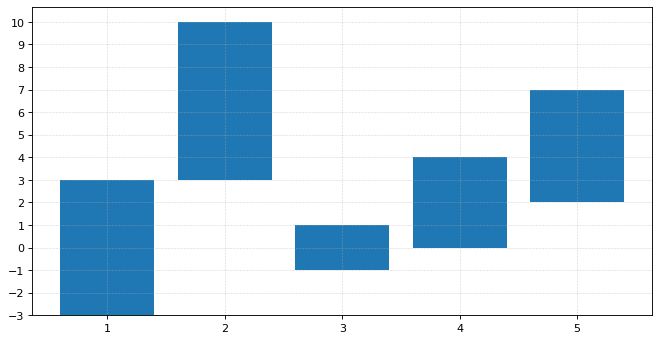

In [106]:
plt.figure(figsize=(10,5), dpi=80)
plt.bar([1,2,3,4,5], height=[6,7,2,4,5], width=0.8, bottom=[-3,3,-1,0,2], label='ok')

ax = plt.gca()
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.grid(linestyle=':', linewidth=0.5)
plt.show()


In [210]:
### numpy常用函数
data = np.array([1,2,3,4,5])
data.mean(), data.std(), data.max(), data.min(), data.argmax(), data.argmin()
data2 = np.array([4,1,5,8,0])
np.maximum(data, data2)
np.minimum(data, data2)
np.median(stock_data['close'])
np.sort(stock_data['close'])

array([278.95, 304.91, 316.67, 326.58, 328.13, 330.42, 331.12, 331.49,
       333.84, 334.98, 339.02, 341.75, 341.86, 342.04, 344.39, 345.01,
       345.88, 346.64, 348.43, 349.16, 351.1 , 351.98, 358.7 , 359.3 ,
       364.79, 366.01, 366.33, 366.65, 382.37, 389.45], dtype=float32)

### 加权平均
S=[$s_1,s_2,s_3,...,s_n$]

W=[$w_1,w_2,w_3,...,w_n$]

np.average(s, weights=w)

加权平均值 = $\frac{s_1*w_1 + s_2*w_2 + s_3*w_3 + ... + s_n*w_n}{w_1 + w_2 + w_3 + ... + w_n}$

当W都为1时,就是算术平均

In [198]:
close_p = np.reshape(data.close, (1, -1))
volume_total = np.reshape(data.volume, (1, -1))

wmap = np.average(data.close, weights=data.volume)
wmap, np.mean(data.close)

(np.float64(344.0387086846302), np.float64(343.93151418740587))

In [ ]:
###时间加权平均,就是w的权重系数,换成时间的权重系数,时间越玩,权重越大

样本: S = [$s_1, s_2, ..., s_n$]

均值: M = $\frac{s_1 + s_2 + ... + s_n}{n}$

离差: D = [$d_1, d_2, ..., d_n], d_i=s_i-m$

方差: Q = [$q_1, q_2, ..., q_n], q_i=d_i^2$

总体方差: V = $\frac{q_1 + q_2 + ... + q_n}{n}$

总体标准差: s = $\sqrt(v)$

样本方差: v' = $\frac{q_1 + q_2 + ... + q_n}{n-1}$

样本标准差: s' = $\sqrt(v')$

In [214]:
np.std(stock_data['close']) ## 总体标准差 s
np.std(stock_data['close'], ddof=1) ## 样本标准差 s'

np.float32(21.877232)


### `np.loadtxt` 的使用方法
`np.loadtxt` 是 NumPy 中用于从文本文件（如 `.txt` 或 `.csv`）加载数据的函数，适用于读取结构化的数值数据。以下是它的用法和参数说明：

#### 函数签名
```python
numpy.loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None)
```

#### 参数说明
1. **`fname`**（必需）：文件路径或文件对象，例如 `'stock_data.csv'`。
2. **`dtype`**（可选，默认 `float`）：指定返回数组的数据类型，可以是单一类型（如 `int`）或结构化类型（如 `{'names': [...], 'formats': [...]}`）。
3. **`delimiter`**（可选，默认 `None`）：列分隔符，例如 `','` 用于 CSV 文件。
4. **`converters`**（可选，默认 `None`）：字典，指定列的自定义转换函数，例如 `{3: lambda v: float(v)}`。
5. **`skiprows`**（可选，默认 `0`）：跳过文件开头的行数，例如 `skiprows=1` 跳过标题行。
6. **`usecols`**（可选，默认 `None`）：指定读取的列，例如 `usecols=(0, 2)`。
7. **`unpack`**（可选，默认 `False`）：若为 `True`，按列返回单独数组。
8. **`comments`**（可选，默认 `'#'`）：忽略以指定字符开头的注释行。
9. **`encoding`**（可选，默认 `'bytes'`）：文件编码，例如 `'utf-8'`。
10. **`max_rows`**（可选，默认 `None`）：读取的最大行数。

#### 返回值
返回一个 NumPy 数组（`ndarray`），形状和类型由文件内容和参数决定。

---

### 基本用法示例
#### 示例 1：简单文本文件
文件 `data.txt`：
```
1 2 3
4 5 6
```
代码：
```python
import numpy as np
data = np.loadtxt('data.txt')
print(data)
```
输出：
```
[[1. 2. 3.]
 [4. 5. 6.]]
```

#### 示例 2：带标题的 CSV 文件
文件 `data.csv`：
```
x,y,z
1,2,3
4,5,6
```
代码：
```python
data = np.loadtxt('data.csv', delimiter=',', skiprows=1)
print(data)
```
输出：
```
[[1. 2. 3.]
 [4. 5. 6.]]
```

#### 示例 3：使用 `converters`
文件 `data_with_units.txt`：
```
1 2.5m 3
4 5.6m 6
```
代码：
```python
data = np.loadtxt('data_with_units.txt', converters={1: lambda s: float(s.rstrip('m'))})
print(data)
```
输出：
```
[[1.  2.5 3. ]
 [4.  5.6 6. ]]
```


`pd.date_range` 是 Pandas 中用于生成日期范围的强大函数，常用于时间序列分析。它可以生成连续的日期序列，并支持多种参数来控制频率、起止时间等。你的问题还包括如何跳过周末，我会详细讲解 `pd.date_range` 的参数用法，并提供跳过周末的具体方法。

---

### `pd.date_range` 函数签名
```python
pandas.date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, inclusive='both', **kwargs)
```

---

### 核心参数说明
1. **`start`（可选）**
   - 类型：字符串、日期时间对象
   - 描述：日期范围的起始时间。
   - 示例：`'2023-01-01'` 或 `pd.Timestamp('2023-01-01')`。

2. **`end`（可选）**
   - 类型：字符串、日期时间对象
   - 描述：日期范围的结束时间。
   - 示例：`'2023-12-31'`。

3. **`periods`（可选）**
   - 类型：整数
   - 描述：生成的时间点数量。如果指定了 `periods`，则 `end` 可省略。
   - 示例：`periods=10`（生成 10 个时间点）。

4. **`freq`（可选，默认 `'D'`）**
   - 类型：字符串或 `DateOffset` 对象
   - 描述：时间间隔（频率），决定每个时间点之间的步长。
   - 常用值：
     - `'D'`：每天
     - `'H'`：每小时
     - `'M'`：每月末
     - `'B'`：每个工作日（跳过周末）
     - `'W'`：每周（默认周日）
     - `'W-MON'`：每周一
   - 示例：`freq='B'`（工作日）。

5. **`tz`（可选）**
   - 类型：字符串或 `pytz.timezone`
   - 描述：时区，例如 `'UTC'`、`'Asia/Shanghai'`。
   - 示例：`tz='America/New_York'`。

6. **`normalize`（可选，默认 `False`）**
   - 类型：布尔值
   - 描述：是否将 `start` 和 `end` 标准化为午夜 00:00。
   - 示例：`normalize=True`。

7. **`name`（可选）**
   - 类型：字符串
   - 描述：生成的时间索引的名称。
   - 示例：`name='dates'`。

8. **`inclusive`（可选，默认 `'both'`）**
   - 类型：字符串（`'both'`、`'neither'`、`'left'`、`'right'`）
   - 描述：控制是否包含边界。
   - 示例：`inclusive='left'`（只包含起始点，不包含结束点）。

---

### 基本用法示例

#### 示例 1：生成每日日期
```python
import pandas as pd

dates = pd.date_range(start='2023-01-01', end='2023-01-10', freq='D')
print(dates)
```

**输出**：
```
DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')
```

#### 示例 2：指定周期数
```python
dates = pd.date_range(start='2023-01-01', periods=5, freq='D')
print(dates)
```

**输出**：
```
DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05'],
              dtype='datetime64[ns]', freq='D')
```

#### 示例 3：每小时频率
```python
dates = pd.date_range(start='2023-01-01 09:00', end='2023-01-01 12:00', freq='H')
print(dates)
```

**输出**：
```
DatetimeIndex(['2023-01-01 09:00:00', '2023-01-01 10:00:00',
               '2023-01-01 11:00:00', '2023-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='H')
```

---

### 如何跳过周末
Pandas 提供了内置的工作日频率 `'B'`，可以直接跳过周末（周六和周日）。此外，还可以通过自定义过滤进一步排除特定日期（如节假日）。

#### 方法 1：使用 `freq='B'`
```python
import pandas as pd

dates = pd.date_range(start='2023-01-01', end='2023-01-10', freq='B')
print(dates)
```

**输出**：
```
DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='B')
```

- **说明**：
  - `'B'` 表示“营业日”（Business Day），自动跳过周六（例如 2023-01-07）和周日（例如 2023-01-08）。
  - 2023-01-01 是周日，也被排除。

#### 方法 2：结合 `weekday` 过滤
如果你需要更灵活的控制（例如只保留周一到周五），可以用 `.weekday` 属性过滤：
```python
import pandas as pd

# 生成完整日期范围
dates = pd.date_range(start='2023-01-01', end='2023-01-10', freq='D')

# 过滤掉周末（weekday: 0=周一, 5=周六, 6=周日）
workdays = dates[dates.weekday < 5]
print(workdays)
```

**输出**：
```
DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq=None)
```

- **说明**：
  - `dates.weekday` 返回 0（周一）到 6（周日）的整数。
  - `< 5` 保留周一到周五。

#### 方法 3：排除节假日
如果除了周末还想跳过特定节假日，可以用 Pandas 的 `CustomBusinessDay`：
```python
import pandas as pd
from pandas.tseries.offsets import CustomBusinessDay

# 定义节假日
holidays = ['2023-01-02']  # 假设这是节假日

# 创建自定义工作日频率
custom_bday = CustomBusinessDay(holidays=holidays)

dates = pd.date_range(start='2023-01-01', end='2023-01-10', freq=custom_bday)
print(dates)
```

**输出**：
```
DatetimeIndex(['2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='C')
```

- **说明**：
  - `CustomBusinessDay` 默认跳过周末，再根据 `holidays` 排除指定日期。

---

### 注意事项
1. **参数组合**：
   - 必须提供 `start` 和 `end` 或 `start` 和 `periods`，否则会报错。
   - 示例：`pd.date_range(start='2023-01-01')` 会失败，需指定 `end` 或 `periods`。

2. **频率选项**：
   - `'B'` 只考虑周末，不包括法定节假日。
   - 用 `CustomBusinessDay` 或外部节假日库（如 `holidays`）处理节假日。

3. **时区**：
   - 如果指定 `tz`，生成的日期会带有时区信息：
     ```python
     dates = pd.date_range(start='2023-01-01', periods=3, freq='D', tz='UTC')
     print(dates)
     # 输出：
     # DatetimeIndex(['2023-01-01 00:00:00+00:00', '2023-01-02 00:00:00+00:00',
     #                '2023-01-03 00:00:00+00:00'],
     #               dtype='datetime64[ns, UTC]', freq='D')
     ```

---

### 总结
- **`pd.date_range` 用法**：
  - 通过 `start`、`end`、`periods` 和 `freq` 生成日期序列。
  - 常用频率：`'D'`（每天）、`'B'`（工作日）、`'H'`（每小时）。
- **跳过周末**：
  - 用 `freq='B'`：简单直接，自动排除周六和周日。
  - 用 `weekday` 过滤：更灵活，适用于自定义需求。
  - 用 `CustomBusinessDay`：可同时跳过周末和节假日。

如果你有具体的时间范围或需要更复杂的日期过滤（例如跳过特定日期），告诉我，我可以进一步帮你调整代码！